In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import squarify

from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import figure
style.use('ggplot')



In [2]:
df = pd.read_csv('Spending_Revenue_cleaned.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,Fiscal Year,Revenue or Spending,Related Govt Units,Organization Group,Department,Program,Character,Object,Sub-object,Fund,Fund Category,Amount
0,1999,Revenue,No,Public Protection,CRT Superior Court,Trial Court Services,Charges For Services,General Government Services,Court Fees,General Fund,Operating,525632.62
1,1999,Spending,No,Public Protection,PDR Public Defender,Criminal And Special Defense,Non Personnel Services,Training,Training Costs Paid To Emplye,General Fund,Operating,425.83
2,1999,Spending,No,"Public Works, Transportation & Commerce",WTR Water Enterprise,Water Facilities Maintenance Projects,Salaries,Permanent Salaries-Misc,Misc-Other Timeoff,Water Operating Fund,Continuing Projects,17433.51
3,1999,Spending,No,General Administration & Finance,ADM Gen Svcs Agency-City Admin,Ag Wts & Measures Inspection,Non Personnel Services,Employee Expenses,Local Field Exp,General Fund,Work Orders/Overhead,24.00
4,1999,Spending,No,"Public Works, Transportation & Commerce",DPW GSA - Public Works,Engineering,Mandatory Fringe Benefits,Unemployment Insurance,Unemployment Insurance,General Fund,Continuing Projects,380.15


In [3]:
# rev_sp = 'Spending'
rev_sp = 'Revenue'

In [4]:
df = df[df['Revenue or Spending'] == rev_sp]

In [5]:
df_dep_sums = df.groupby(['Department'])[['Amount']].agg('sum')
df_dep_sums.columns = ['Amount_Sum_199-2017']
df_dep_sums

,Amount_Sum_199-2017
Department,
AAM Asian Art Museum,5.568430e+07
ADM Gen Svcs Agency-City Admin,2.033016e+09
ADP Adult Probation,9.427495e+07
AIR Airport Commission,1.648631e+10
ART Arts Commission,1.196322e+08
ASR Assessor / Recorder,8.488547e+07
BOA Board Of Appeals - PAB,1.028638e+07
BOS Board Of Supervisors,5.345533e+06
CAT City Attorney,5.377214e+07


In [6]:
df_org_sums = df.groupby(['Organization Group'])[['Amount']].agg('sum')
df_org_sums.columns = ['Amount_Sum_199-2017']
df_org_sums

,Amount_Sum_199-2017
Organization Group,
Community Health,2.289428e+10
Culture & Recreation,4.759059e+09
General Administration & Finance,3.072211e+10
General City Responsibilities,3.387567e+10
Human Welfare & Neighborhood Development,1.914676e+10
Public Protection,4.979824e+09
"Public Works, Transportation & Commerce",6.006732e+10


In [7]:
df_dep_to_org = df.groupby(['Department'])[['Organization Group']].agg('min')
df_dep_to_org.columns = ['Organization Group']
df_dep_to_org

,Organization Group
Department,
AAM Asian Art Museum,Culture & Recreation
ADM Gen Svcs Agency-City Admin,Culture & Recreation
ADP Adult Probation,Public Protection
AIR Airport Commission,"Public Works, Transportation & Commerce"
ART Arts Commission,Culture & Recreation
ASR Assessor / Recorder,General Administration & Finance
BOA Board Of Appeals - PAB,"Public Works, Transportation & Commerce"
BOS Board Of Supervisors,General Administration & Finance
CAT City Attorney,General Administration & Finance


In [8]:
df['Organization Group'].value_counts()

General Administration & Finance            22582
Public Works, Transportation & Commerce     21694
Community Health                            10164
Human Welfare & Neighborhood Development     7389
Public Protection                            5611
Culture & Recreation                         5216
General City Responsibilities                2902
Name: Organization Group, dtype: int64

In [9]:
df_dep_to_org['Departments'] = df_dep_to_org.index
df_dep_to_org.reset_index(inplace=True)
df_dep_to_org.drop(columns='Department', axis=1,inplace=True)
df_dep_to_org.head()

,Organization Group,Departments
0,Culture & Recreation,AAM Asian Art Museum
1,Culture & Recreation,ADM Gen Svcs Agency-City Admin
2,Public Protection,ADP Adult Probation
3,"Public Works, Transportation & Commerce",AIR Airport Commission
4,Culture & Recreation,ART Arts Commission


In [10]:
org_encoding = {
    'Community Health' : 1,
    'Culture & Recreation' : 2,
    'General Administration & Finance' : 3,
    'General City Responsibilities' : 4,
    'Human Welfare & Neighborhood Development' : 5,
    'Public Protection' : 6,
    'Public Works, Transportation & Commerce' : 7
}

In [11]:
df_dep_to_org.index

RangeIndex(start=0, stop=60, step=1)

In [12]:
df_dep_to_org['Group Code'] = df_dep_to_org['Organization Group'].map(org_encoding)

In [13]:
df_dep_to_org.columns

Index(['Organization Group', 'Departments', 'Group Code'], dtype='object')

In [14]:
df_dep_to_org

,Organization Group,Departments,Group Code
0,Culture & Recreation,AAM Asian Art Museum,2
1,Culture & Recreation,ADM Gen Svcs Agency-City Admin,2
2,Public Protection,ADP Adult Probation,6
3,"Public Works, Transportation & Commerce",AIR Airport Commission,7
4,Culture & Recreation,ART Arts Commission,2
5,General Administration & Finance,ASR Assessor / Recorder,3
6,"Public Works, Transportation & Commerce",BOA Board Of Appeals - PAB,7
7,General Administration & Finance,BOS Board Of Supervisors,3
8,General Administration & Finance,CAT City Attorney,3
9,Human Welfare & Neighborhood Development,CCD SF Communtiy College Dist,5


In [15]:
df_dep_sums.reset_index(inplace=True)
df_dep_sums

,Department,Amount_Sum_199-2017
0,AAM Asian Art Museum,5.568430e+07
1,ADM Gen Svcs Agency-City Admin,2.033016e+09
2,ADP Adult Probation,9.427495e+07
3,AIR Airport Commission,1.648631e+10
4,ART Arts Commission,1.196322e+08
5,ASR Assessor / Recorder,8.488547e+07
6,BOA Board Of Appeals - PAB,1.028638e+07
7,BOS Board Of Supervisors,5.345533e+06
8,CAT City Attorney,5.377214e+07
9,CCD SF Communtiy College Dist,1.875607e+09


In [16]:
df_dep_sums.rename(columns={'Department' : 'Departments'}, inplace=True)
df_dep_sums

,Departments,Amount_Sum_199-2017
0,AAM Asian Art Museum,5.568430e+07
1,ADM Gen Svcs Agency-City Admin,2.033016e+09
2,ADP Adult Probation,9.427495e+07
3,AIR Airport Commission,1.648631e+10
4,ART Arts Commission,1.196322e+08
5,ASR Assessor / Recorder,8.488547e+07
6,BOA Board Of Appeals - PAB,1.028638e+07
7,BOS Board Of Supervisors,5.345533e+06
8,CAT City Attorney,5.377214e+07
9,CCD SF Communtiy College Dist,1.875607e+09


In [17]:
left_merged = pd.merge(df_dep_to_org, df_dep_sums,
                        how="left", on=["Departments"])

left_merged

,Organization Group,Departments,Group Code,Amount_Sum_199-2017
0,Culture & Recreation,AAM Asian Art Museum,2,5.568430e+07
1,Culture & Recreation,ADM Gen Svcs Agency-City Admin,2,2.033016e+09
2,Public Protection,ADP Adult Probation,6,9.427495e+07
3,"Public Works, Transportation & Commerce",AIR Airport Commission,7,1.648631e+10
4,Culture & Recreation,ART Arts Commission,2,1.196322e+08
5,General Administration & Finance,ASR Assessor / Recorder,3,8.488547e+07
6,"Public Works, Transportation & Commerce",BOA Board Of Appeals - PAB,7,1.028638e+07
7,General Administration & Finance,BOS Board Of Supervisors,3,5.345533e+06
8,General Administration & Finance,CAT City Attorney,3,5.377214e+07
9,Human Welfare & Neighborhood Development,CCD SF Communtiy College Dist,5,1.875607e+09


In [18]:
def dep_sums(org_group, df, rev_sp):
    plt.figure(figsize=(26,18))
    # plt.title('Department Revenue Sums of Public Protection 1999-2017')
    plt.title('Department {} Sums of {} 1999-2017'.format(rev_sp, org_group))


    sizes = df['Amount_Sum_199-2017']
    label_sizes = df['Amount_Sum_199-2017'].round(2)
    labels = list(zip(df.Departments, label_sizes))

    np.random.seed(seed=1)
    if rev_sp == 'Spending':
        colors = plt.cm.coolwarm(np.random.rand(len(sizes)))
    elif rev_sp == 'Revenue':
        colors = plt.cm.cool(np.random.rand(len(sizes)))

    squarify.plot(
        sizes = sizes,
        color = colors,
        label = labels)

    plt.axis('off')
    plt.savefig('images/{}_{}.png'.format(org_group, rev_sp))

In [19]:
org_groups = left_merged['Organization Group'].unique()
org_groups

array(['Culture & Recreation', 'Public Protection',
       'Public Works, Transportation & Commerce',
       'General Administration & Finance',
       'Human Welfare & Neighborhood Development', 'Community Health',
       'General City Responsibilities'], dtype=object)

In [20]:
# left_merged[left_merged['Organization Group'] == 'General City Responsibilities']

Culture & Recreation
Public Protection
Public Works, Transportation & Commerce
General Administration & Finance
Human Welfare & Neighborhood Development
Community Health
General City Responsibilities


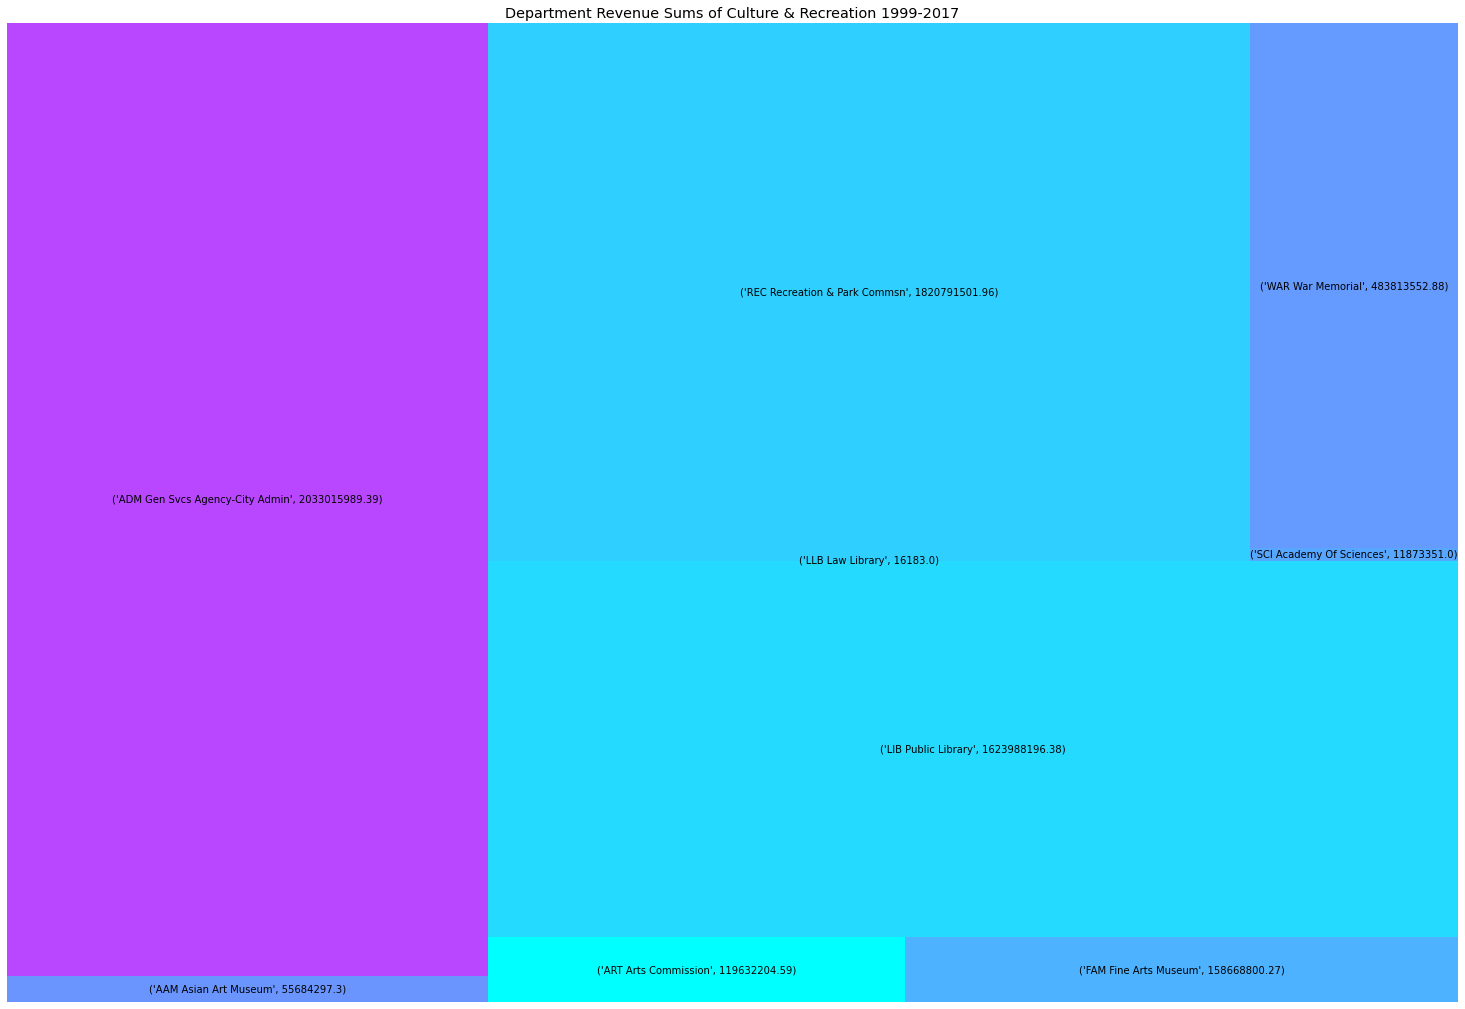

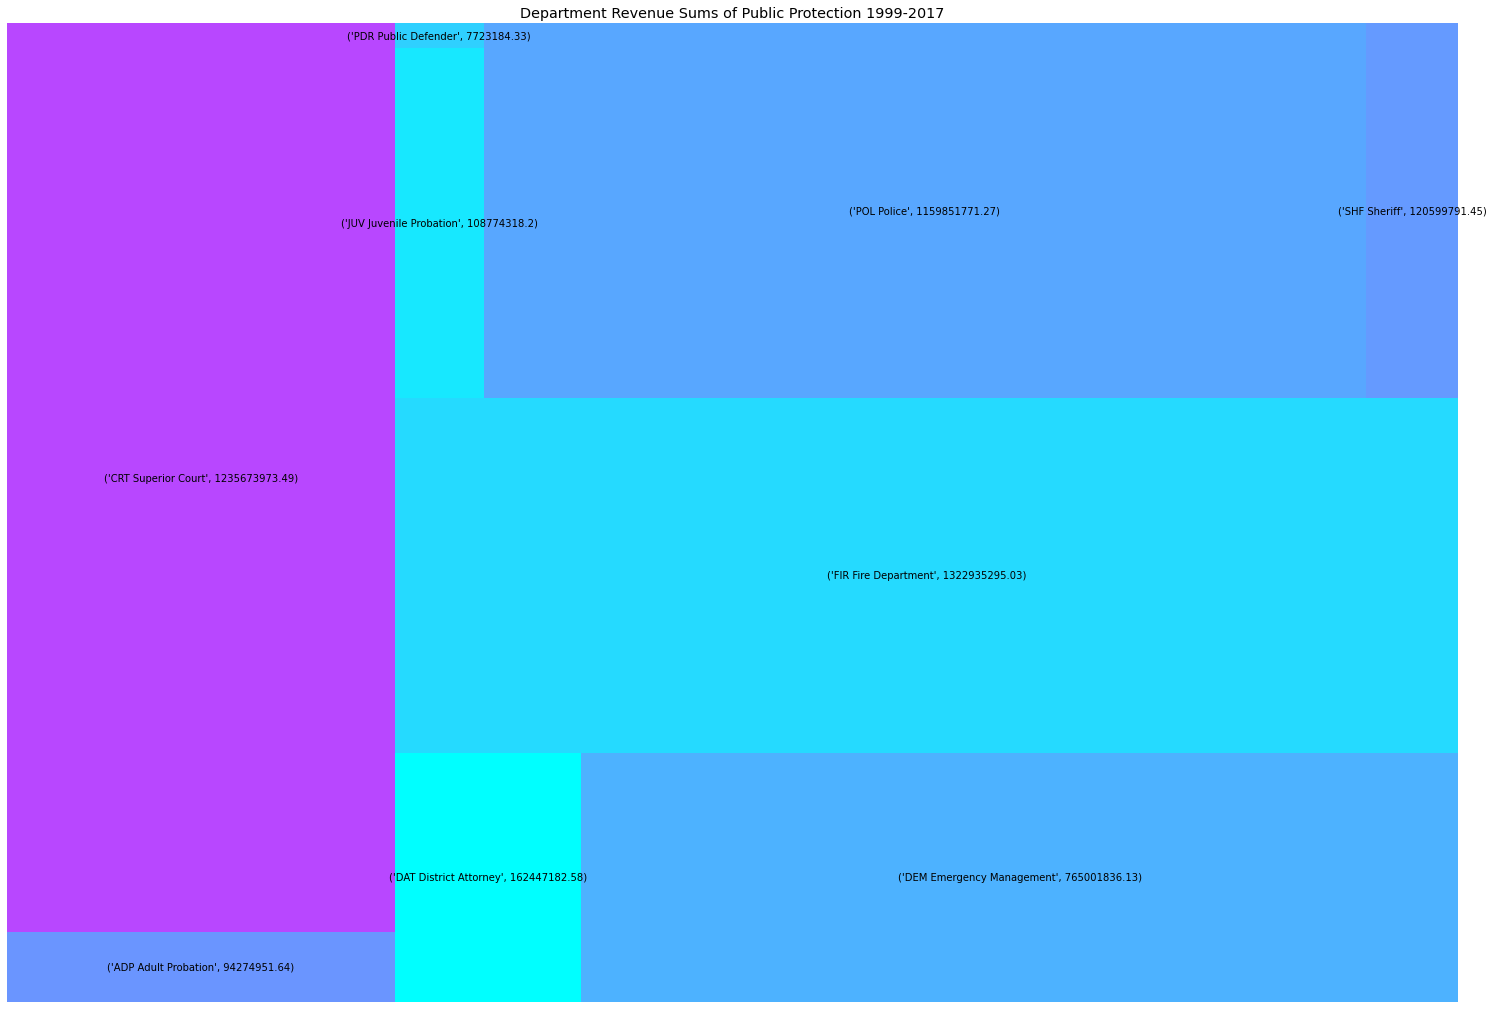

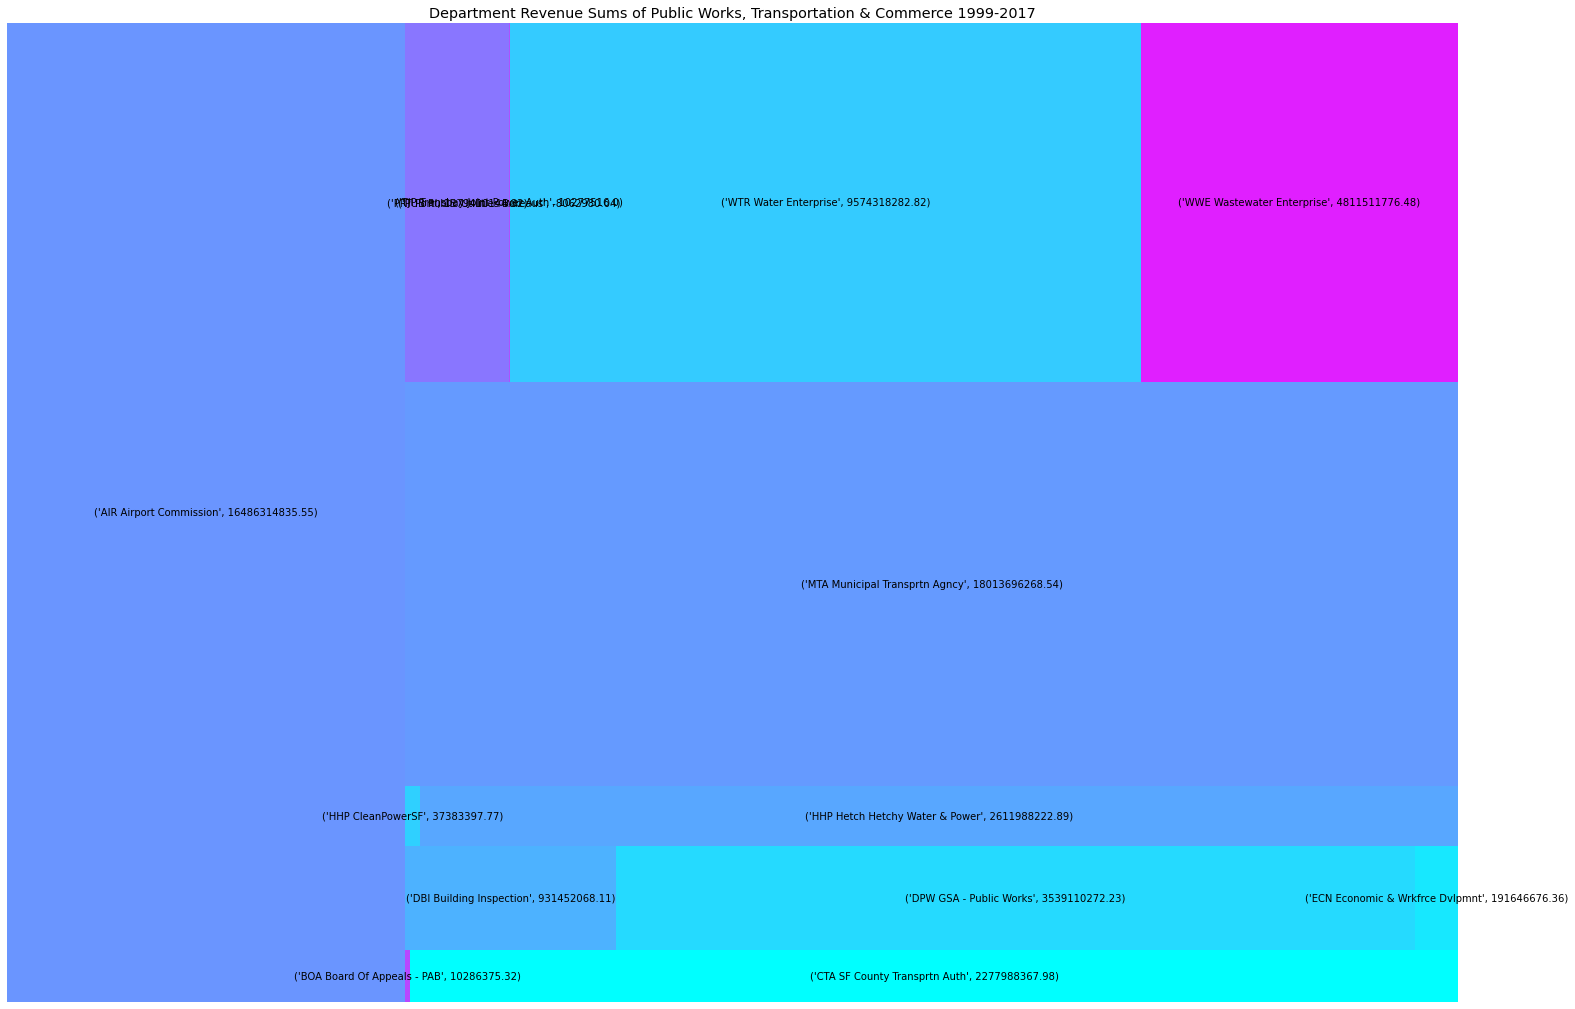

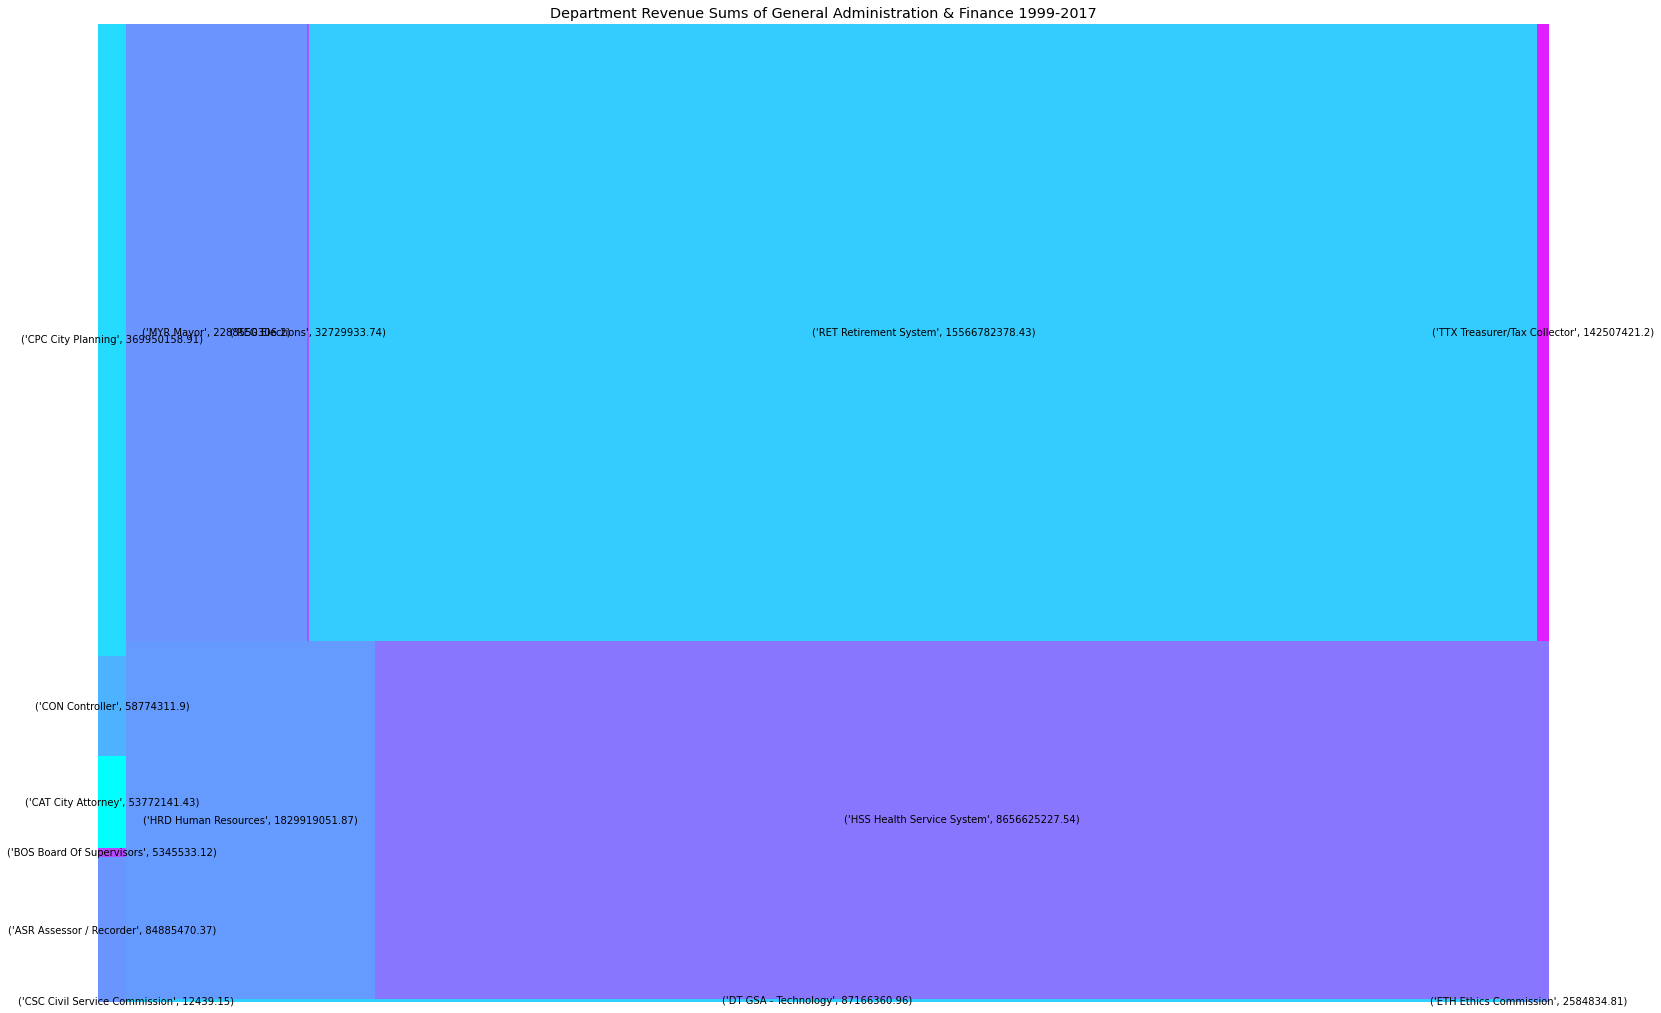

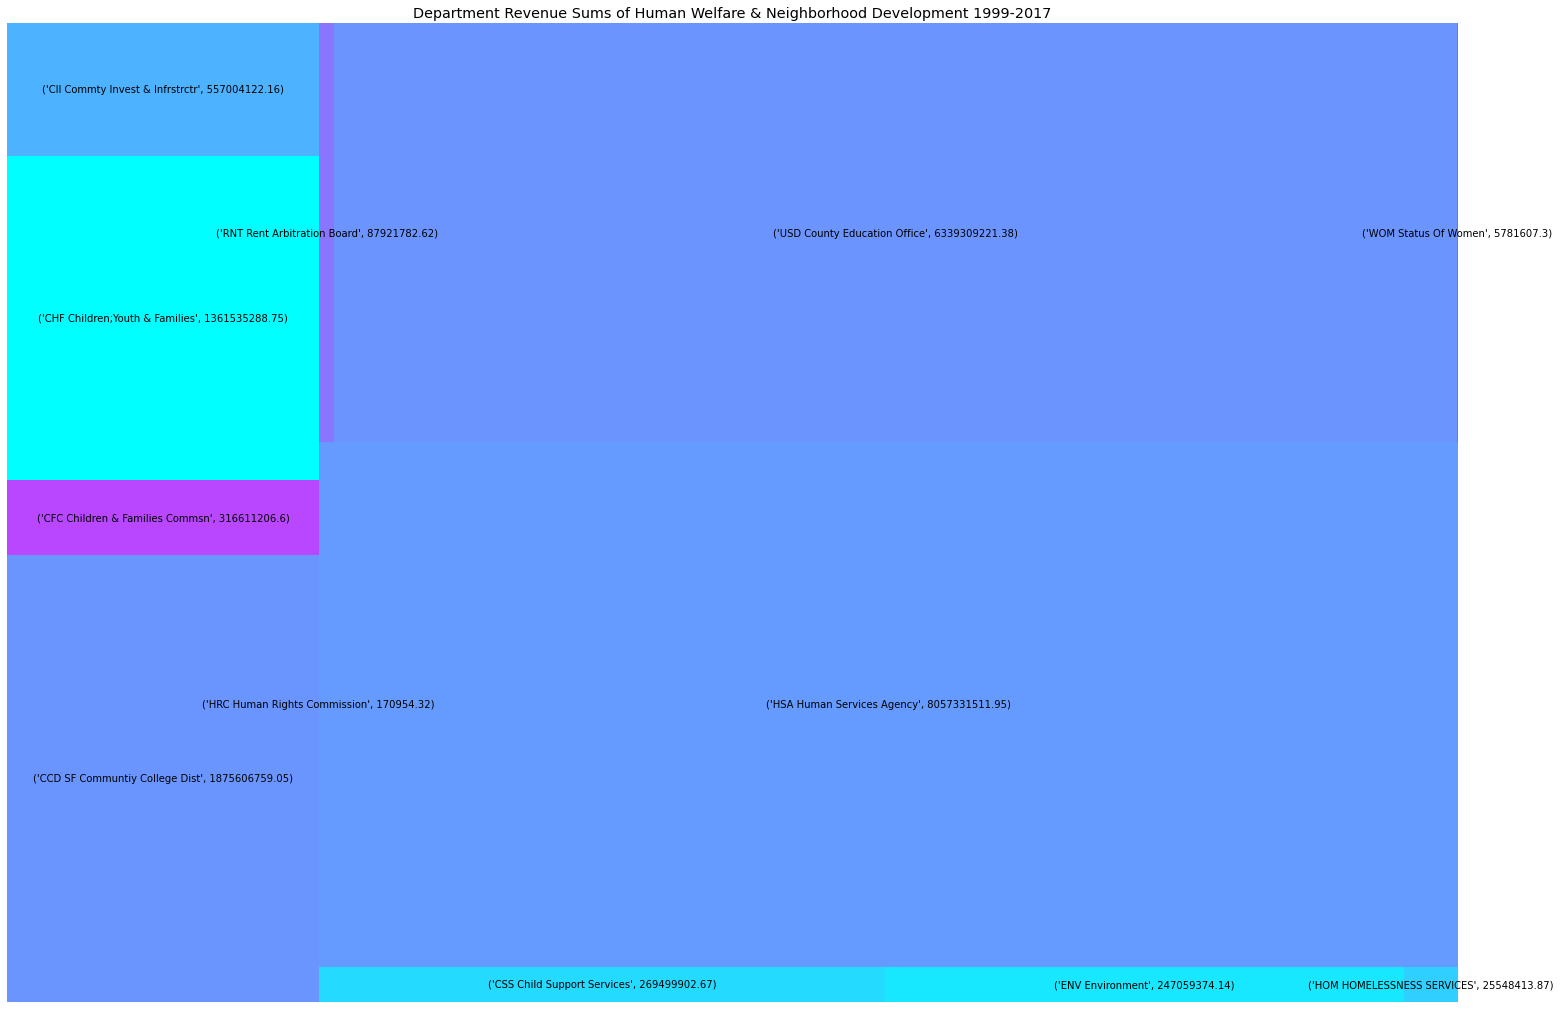

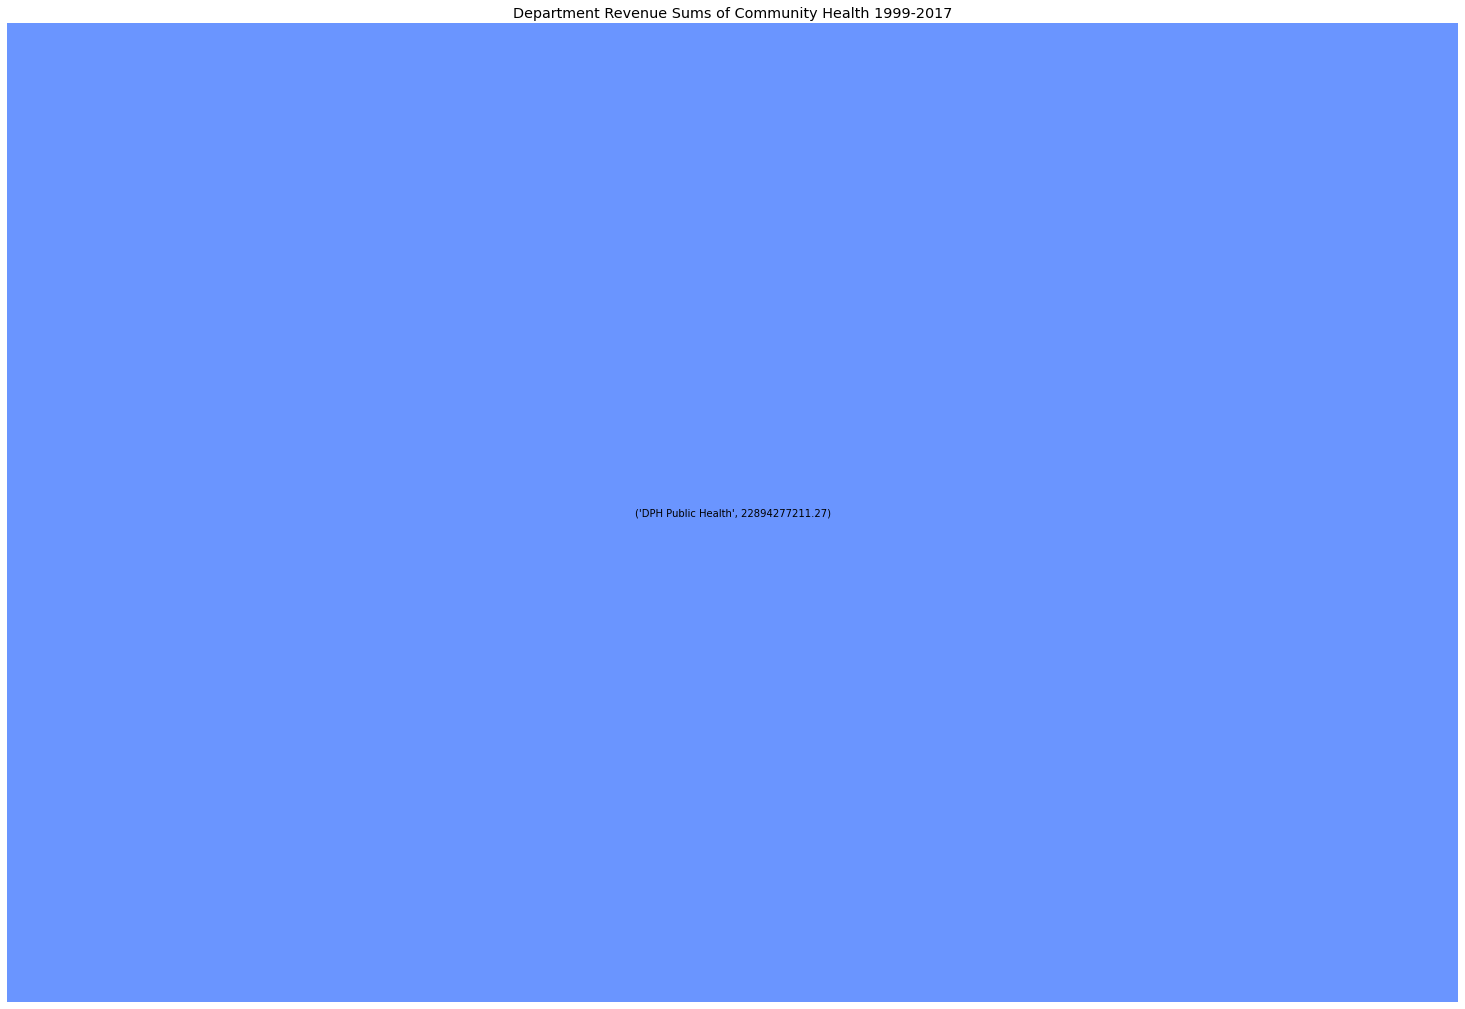

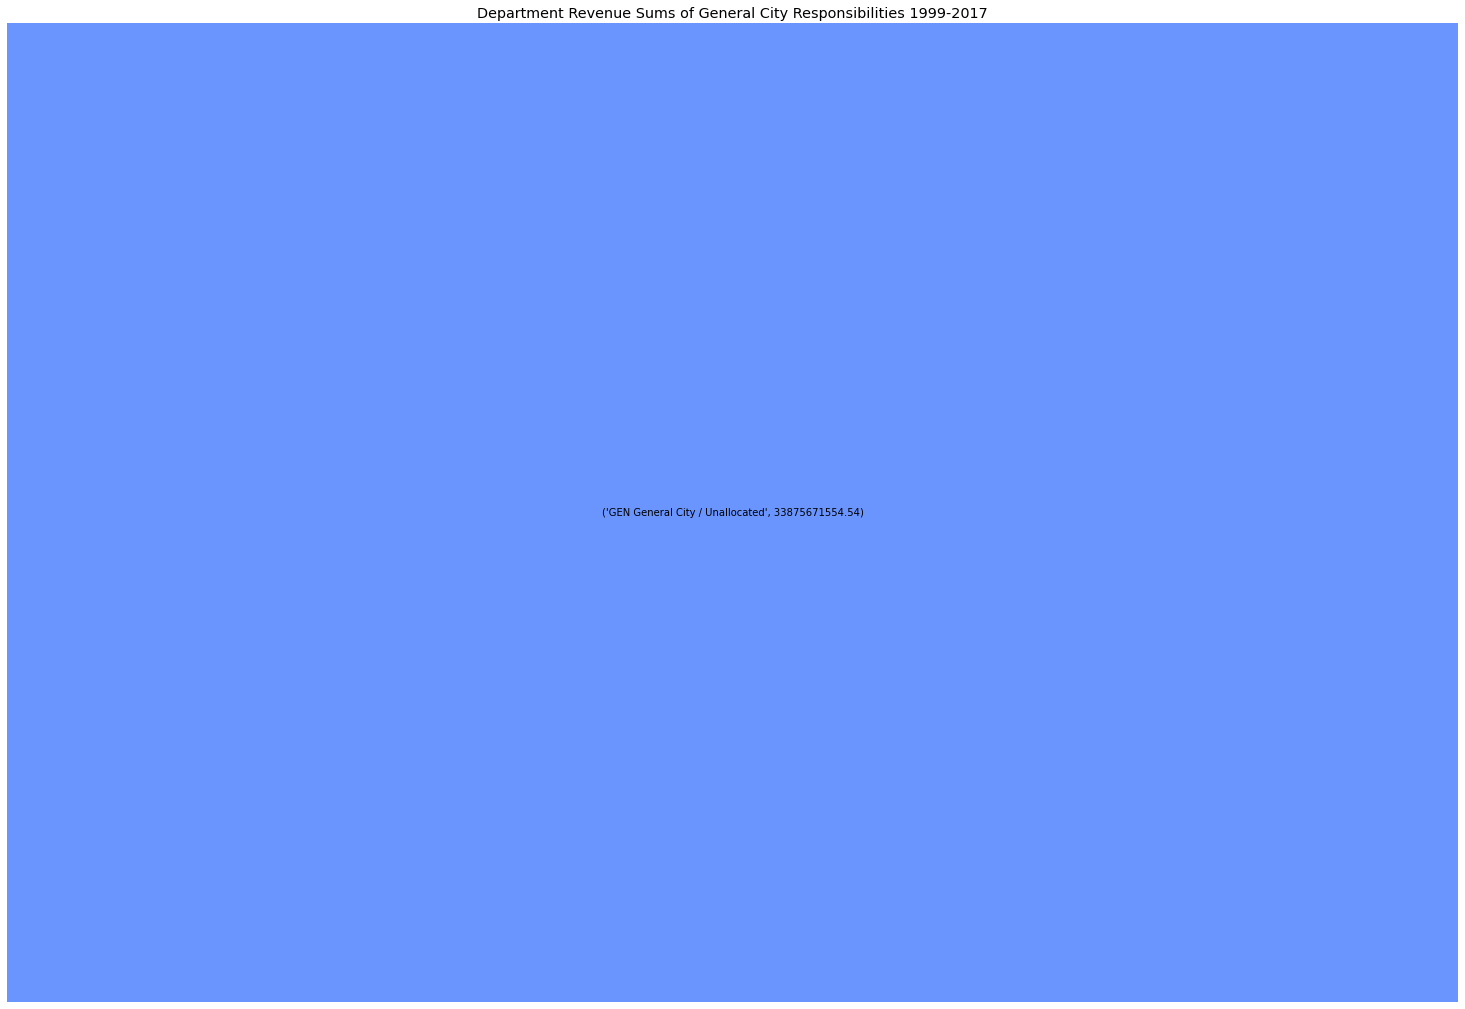

In [21]:
for group in org_groups:
    print(group)
    df = left_merged[left_merged['Organization Group'] == group]
    df.to_csv('dep_data/{}_{}.csv'.format(group, rev_sp))
    dep_sums(group, df, rev_sp)

In [22]:
left_merged.to_csv('SF_{}_Departments_And_GroupCode.csv'.format(rev_sp))